The plot of the Retweet network with node size showing their betweenness centrality, with a one-paragraph description of how your betweenness approximation function works.

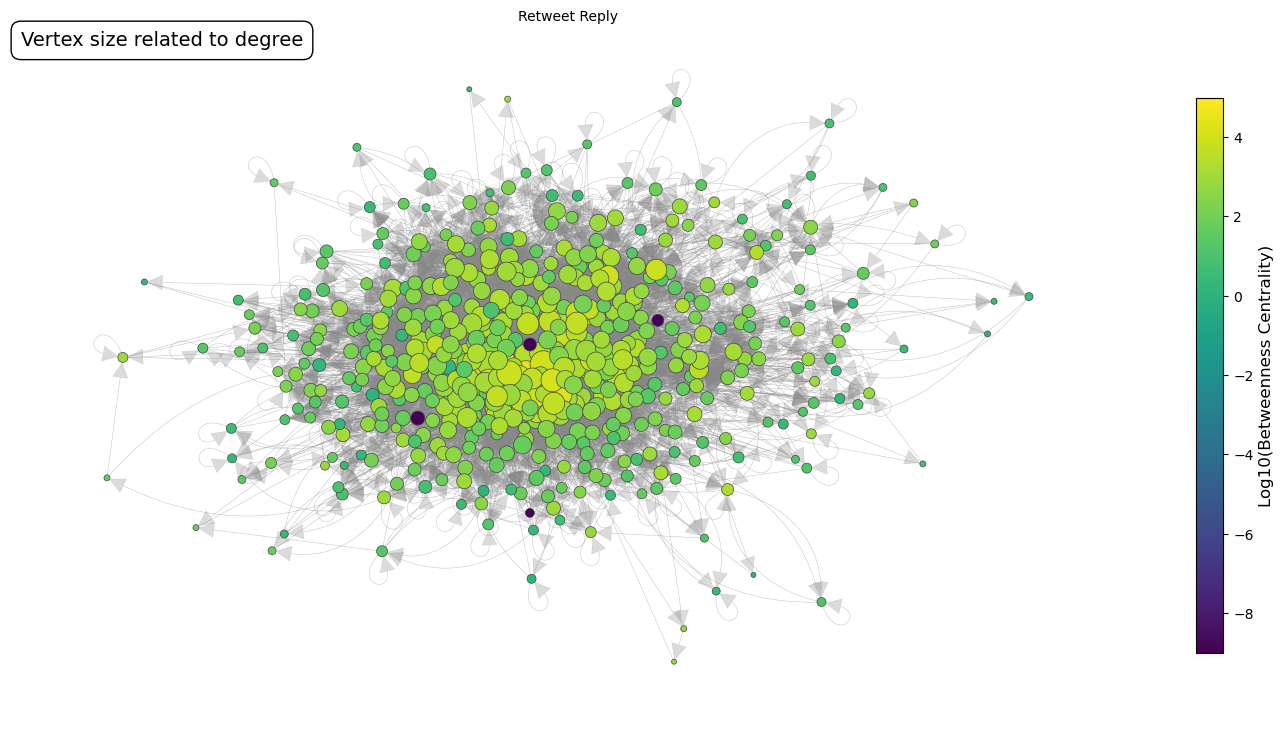

In [53]:
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import plotly.graph_objects as go

ig.config["plotting.backend"] = "matplotlib"
g = ig.Graph.Read("filtered_social_network.pickle", format="pickle")

degrees = g.degree()
betweenness = g.betweenness()

# Calculate visual properties
vertex_size = [max(5, 5 * np.log(1 + degree)) for degree in degrees]
edge_width = [0.3 for _ in g.es]

# Normalize betweenness for color scaling using a log scale
if betweenness:
    # Avoid log(0) by adding a small constant
    betweenness = [b + 1e-9 for b in betweenness]
    log_betweenness = np.log10(betweenness)
    min_log_bet = min(log_betweenness)
    max_log_bet = max(log_betweenness)
    normalized_betweenness = [
        (b - min_log_bet) / (max_log_bet - min_log_bet) if max_log_bet > min_log_bet else 0.5 for b in log_betweenness
    ]
else:
    normalized_betweenness = [0.5] * len(g.vs)  # Default to 0.5 if no betweenness values

# Create a colormap and map normalized betweenness to colors
cmap = cm.viridis  # You can choose other colormaps like 'plasma', 'inferno', etc.
vertex_color = [colors.to_hex(cmap(b)) for b in normalized_betweenness]

# Create layout with more spacing (manually scale after computation)
layout = g.layout_fruchterman_reingold(
    weights=g.es['weight'],
    niter=1000  # More iterations for better resolution
)

# Convert layout to numpy array and scale coordinates for more spacing
layout_array = np.array(layout.coords)
#layout_array *= 1000  # Scale coordinates to spread nodes farther apart

# Create new layout with scaled coordinates
layout = ig.Layout(layout_array.tolist())

# Plot settings
visual_style = {
    "vertex_size": vertex_size,
    "vertex_color": vertex_color,
    "vertex_label": None,
    "edge_width": edge_width,
    "edge_color": "rgba(136, 136, 136, 0.3)",
    "layout": layout,
    "bbox": (4000, 2000),  # Increased bbox width for a wider plot
    "margin": 200,  # Increased margin
    "vertex_frame_color": "#444444",
    "vertex_frame_width": 0.5,
}

# Set figure size (wider plot)
fig, ax = plt.subplots(figsize=(18, 9))  # Adjust width-to-height ratio for a wider plot
ax.set_title("Retweet Reply", fontsize=10)
# Create the plot with the specified figure
ig.plot(
    g, 
    target=ax,
    **visual_style
)

# Add the colorbar
norm = colors.Normalize(vmin=min_log_bet, vmax=max_log_bet)  # Normalize the log-scaled values
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for ScalarMappable

# Add the colorbar to the plot
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.8)
cbar.set_label('Log10(Betweenness Centrality)', fontsize=12)
cbar.ax.tick_params(labelsize=10)

# Add a text box to describe the vertex size relationship
text_x = -1.2 * max(layout_array[:, 0])  # Position the text on the left of the plot
text_y = 1.2 * max(layout_array[:, 1])  # Position the text above the plot
ax.text(
    text_x, text_y,
    "Vertex size related to degree",
    fontsize=14,
    color="black",
    bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.5"),
    horizontalalignment="left",
    verticalalignment="center",
)

plt.show()

Betweenness in a graph measures how important a node or edge is in connecting different parts of the network. It looks at how often a node or edge appears on the shortest paths between other pairs of nodes. If a node is frequently used as a bridge to connect other nodes, it has high betweenness. This means it plays a key role in transferring information, in a social network, a person with high betweenness might be someone who connects two otherwise separate groups of people, making them a crucial link for communication or collaboration.